## Universo "Fraude Basari" ampliado. Equivale a DNI marcados con "Alerta" en tabla clientes y DNIs que hayan impagado alguna vez( OP_Numimphist>0 )

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [3]:
import pandas as pd

In [ ]:
print("ME ENCANTA EL CURSO DE GITHUB!")

In [ ]:
print("Hola Nayra")



Hola Nayra


In [4]:
from sqlalchemy import create_engine
server = 'SPADWHTEST' 
database = 'SANDBOX_RIESGOS' 
engine = create_engine('mssql+pyodbc://'+ server + '/' + database + '?trusted_connection=yes&driver=ODBC+Driver+13+for+SQL+Server') # Nayra ODBC+Driver+11

In [5]:
df = pd.read_sql("SELECT * FROM SANDBOX_RIESGOS.[dbo].confusion_matrix_iovation;", engine)

In [6]:
df['IDPropuesta'].count()

26977

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
pd.set_option('display.max_rows', 500)

In [9]:
df.head()

,IDPropuesta,DNI,EMail,Telefono,Alias,Score,Score_Baseline,V1_Score_DNI_Email,V1_Max_Email_Peticion,V2_Score_DNI_Telefono,V2_Max_Telefono_Peticion,V3_Score_DNI_Dispositivo,V3_Max_Dispositivo_Peticion,V4_Score_Email_DNI,V4_Max_DNI_Peticion,V5_Score_Email_Telefono,V5_Max_Telefono_Peticion,V6_Score_Email_Dispositivo,V6_Max_Dispositivo_Peticion,V7_Score_Telefono_DNI,V7_Max_DNI_Peticion,V8_Score_Telefono_Email,V8_Max_EMAIL_Peticion,V9_Score_Telefono_Dispositivo,V9_Max_Dispositivo_Peticion,V10_Score_Dispositivo_DNI,V10_Max_DNI_Peticion,V11_Score_Dispositivo_DNI,V11_Max_EMAIL_Peticion,V12_Score_Dispositivo_DNI,V12_Max_TELEFONO_Peticion,Fraude_Basari,FechaHoraAlta,Estado,Nuevo_Viejo_ECO,SECTORHOGARDESG,PDV_Hijo_nombre,regla_negativa,Accounts Created Per Device- 2 in 30 days,Accounts Per Device- 3 Max,Botnet Risk,Proxy in Use,Owned Evidence Exists,Device Risk (local)- Min 20 Percent,Suspect Device Data,IP Address Risk (global)- Min 50 Percent,Countries Per Account- 2 in 1 day,Countries Per Device- 2 in 1 day,Device Risk (global)- Min 50 Percent,TOR Exit Node IP,High Risk Country,High Risk ISPs (global),Other Subscriber Policy Fraud Evidence,Other Subscriber ID Theft Evidence,Other Subscriber ATO Evidence,Other Subscriber Financial Evidence,Other Subscriber Miscellaneous Evidence,Other Subscriber Cheating Evidence,Timezone/Geolocation Mismatch- More Than 3,Transactions Per Device (local)- 5 in 1 day,Transactions Per IP- 5 in 1 hour
0,5082956,71139283F,JUAMEROD@HOTMAIL.COM,625668327,216261651040592336,-2,0,0,1.0,0,1.0,0,1,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,-1,56,-1,54,-1,55,0,2022-01-14 21:16:18,ACT,Nuevo,Electrodomesticos,EVVO HOME,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5102042,45668526W,ANGEL_ANUXKA@HOTMAIL.ES,657065605,214333998449484870,-1,0,0,1.0,0,1.0,0,1,-1,2.0,0,1.0,0,1.0,-1,2.0,0,1.0,0,1.0,-1,2,0,1,0,1,0,2022-01-28 21:43:38,WTD,Nuevo,Electrodomesticos,EVVO HOME,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5102044,16079736E,ANGEL_ANUXKA@HOTMAIL.ES,657065605,214333998449484870,-2,0,0,1.0,0,1.0,0,1,0,1.0,0,1.0,0,1.0,-1,2.0,0,1.0,0,1.0,-1,2,0,1,0,1,0,2022-01-28 22:32:45,WTD,Nuevo,Electrodomesticos,EVVO HOME,False,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4946457,06266493M,SONIAAREVALOROMERO10@GMAIL.COM,666732809,713499982991350403,-1,0,0,1.0,0,1.0,0,1,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1,0,1,0,1,1,2021-09-28 20:17:37,ACT,Nuevo,Electrodomesticos,ELECTROBUENO,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4969389,22647577Y,RUBIA_23@MSN.COM,610865025,416617861425348006,0,0,0,1.0,0,1.0,0,1,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1.0,0,1,0,1,0,1,0,2021-10-17 13:41:28,WTD,Nuevo,Electrodomesticos,EVVO HOME,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


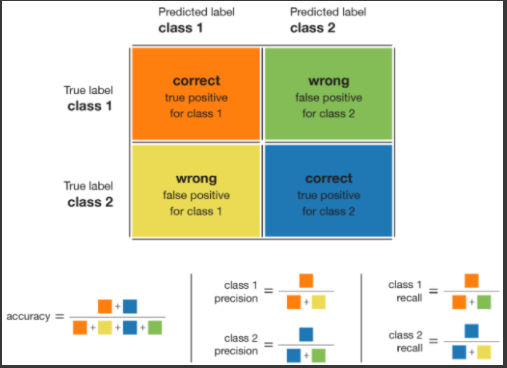

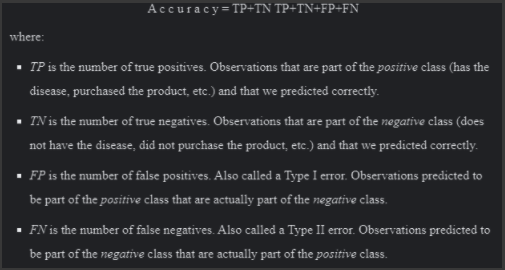

In [11]:
def calcula_estadisticas_accuracy(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    
    Accuracy = (TP+TN) / (TP+TN+FP+FN)
    Precision = TP / (TP+FP) 
    Recall = TP / (TP+FN)
    F1 = (2*Precision*Recall) / (Precision + Recall)
    
    print("True Positives {}".format(TP))
    print("False Positives {}".format(FP))
    print("True Negativos {}".format(TN))
    print("False Negativos {}".format(FN))
    print("Accuracy {}".format(Accuracy))
    print("Precision {}".format(Precision))
    print("Recall {}".format(Recall))
    print("F1 {}".format(F1))

- V1: un dni con más de un email
- V2: un dni con más de un teléfono
- V3: un dni con más de un dispositivo
- V4: un email con más de un DNI
- V5: un email con más de un teléfono
- V6: un email con más de un dispositivo
- V7: un teléfono con más de un DNI
- V8: un teléfono con más de un email
- V9: un teléfono con más de un dispositivo
- V10: un dispositivo con más de un DNI
- V11: un dispositivo con más de un email
- V12: un dispositivo con más de un teléfono

### V0: BASELINE

In [12]:
df['Score_Baseline'].value_counts()

 0      25256
-1       1010
-2        407
-100      111
-50       102
-101       17
-102       10
-52         7
-109        5
-51         5
-66         5
-3          5
-201        4
-152        4
-200        4
-57         3
-60         3
-127        3
-150        2
-160        2
-202        2
-123        2
-103        2
-108        1
-114        1
-110        1
-156        1
-125        1
-116        1
Name: Score_Baseline, dtype: int64

In [15]:
df['Score_Baseline_Nuevo']=df['Score_Baseline'].apply(lambda x: 1 if x<=-3 else 0) #A dia de hoy Iovation es semaforo rojo desde score -3

In [16]:
df['Score_Baseline_Nuevo'].value_counts()

0    26673
1      304
Name: Score_Baseline_Nuevo, dtype: int64

In [17]:
Fraude_real = df['Fraude_Basari']
Fraude_predicho = df['Score_Baseline_Nuevo']

In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0}".format(accuracy_score(Fraude_real,Fraude_predicho)))

Accuracy: 0.804574266968158


Confusion Matrix

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

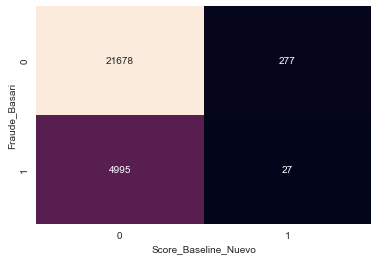

In [21]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Score_Baseline_Nuevo'] , rownames=['Fraude_Basari'], colnames=['Score_Baseline_Nuevo'])

# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.set_style("whitegrid")
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
plt.show()

In [22]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Score_Baseline_Nuevo'])

True Positives 27
False Positives 277
True Negativos 21678
False Negativos 4995
Accuracy 0.804574266968158
Precision 0.08881578947368421
Recall 0.005376344086021506
F1 0.010138941043935411


- A c c u r a c y = TP+TN / TP+TN+FP+FN   #exactitud
- Precision = TP / TP+FP #Los positivos bien respecto a todos los que dijiste que eran positivos
- Recall = TP / TP+FN
- F1 = (2 × Precision × Recall) / (Precision + Recall)

### V1: un dni con más de un email

In [23]:
df['Baseline_V1']=(df['Score_Baseline']+df['V1_Score_DNI_Email']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [24]:
df['Baseline_V1'].value_counts()

0    26583
1      394
Name: Baseline_V1, dtype: int64

In [26]:
Fraude_real = df['Fraude_Basari']
Fraude_predicho = df['Baseline_V1']

In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0}".format(accuracy_score(Fraude_real,Fraude_predicho)))

Accuracy: 0.8027208362679319


Confusion Matrix: V1 + Baseline

In [28]:
# import seaborn as sn
# import matplotlib.pyplot as plt
# import numpy as np

In [29]:
# df2=df[['Baseline_V1','V1_Score_DNI_Email','Score_Baseline']]
# df2[df2['Baseline_V1'] == 1].head()
# df2[df2['Score_Baseline'] <=-3& (df[col] < 0.7) ].head()

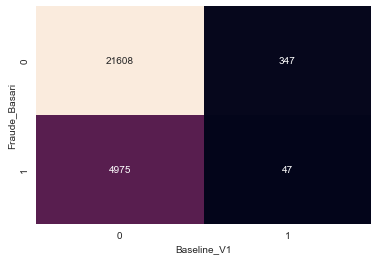

In [30]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V1'] , rownames=['Fraude_Basari'], colnames=['Baseline_V1'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [31]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V1'])
#Aumentamos falsos positivos 
#Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 47
False Positives 347
True Negativos 21608
False Negativos 4975
Accuracy 0.8027208362679319
Precision 0.11928934010152284
Recall 0.009358821186778176
F1 0.01735598227474151


### V2: un dni con más de un teléfono

In [32]:
df['Baseline_V2']=(df['Score_Baseline']+df['V2_Score_DNI_Telefono']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [33]:
df['Baseline_V2'].value_counts()

0    26603
1      374
Name: Baseline_V2, dtype: int64

Confusion Matrix: V2 + Baseline

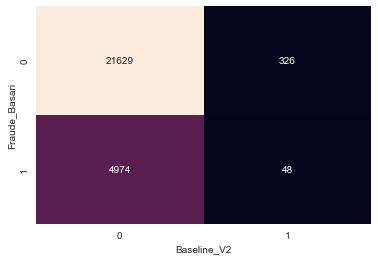

In [34]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V2'] , rownames=['Fraude_Basari'], colnames=['Baseline_V2'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [35]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V2'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 48
False Positives 326
True Negativos 21629
False Negativos 4974
Accuracy 0.8035363457760314
Precision 0.12834224598930483
Recall 0.009557945041816009
F1 0.017790956263899184


### V3: un dni con más de un dispositivo

In [36]:
df['Baseline_V3']=(df['Score_Baseline']+df['V3_Score_DNI_Dispositivo']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [37]:
df['Baseline_V3'].value_counts()

0    26547
1      430
Name: Baseline_V3, dtype: int64

Confusion Matrix: V3 + Baseline

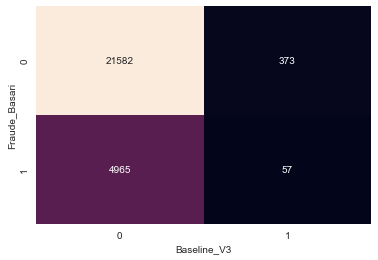

In [38]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V3'] , rownames=['Fraude_Basari'], colnames=['Baseline_V3'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [39]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V3'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 57
False Positives 373
True Negativos 21582
False Negativos 4965
Accuracy 0.8021277384438595
Precision 0.1325581395348837
Recall 0.011350059737156512
F1 0.02090975788701394


### V4: un email con más de un DNI

In [40]:
df['Baseline_V4']=(df['Score_Baseline']+df['V4_Score_Email_DNI']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [41]:
df['Baseline_V4'].value_counts()

0    26535
1      442
Name: Baseline_V4, dtype: int64

Confusion Matrix: V4 + Baseline

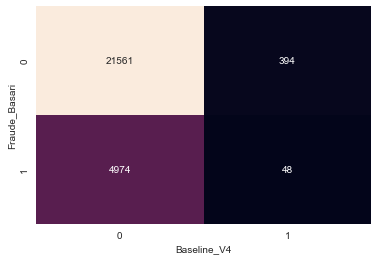

In [42]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V4'] , rownames=['Fraude_Basari'], colnames=['Baseline_V4'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [43]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V4'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 48
False Positives 394
True Negativos 21561
False Negativos 4974
Accuracy 0.8010156800237239
Precision 0.1085972850678733
Recall 0.009557945041816009
F1 0.017569546120058562


### V5: un email con más de un teléfono

In [44]:
df['Baseline_V5']=(df['Score_Baseline']+df['V5_Score_Email_Telefono']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [45]:
df['Baseline_V5'].value_counts()

0    26586
1      391
Name: Baseline_V5, dtype: int64

Confusion Matrix: V5 + Baseline

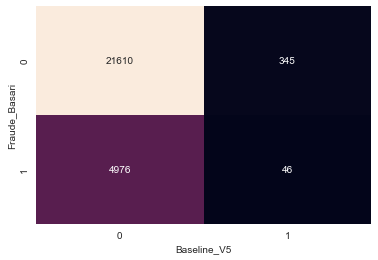

In [46]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V5'] , rownames=['Fraude_Basari'], colnames=['Baseline_V5'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [47]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V5'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 46
False Positives 345
True Negativos 21610
False Negativos 4976
Accuracy 0.8027579048819364
Precision 0.11764705882352941
Recall 0.009159697331740343
F1 0.016996120450766674


### V6: un email con más de un dispositivo

In [48]:
df['Baseline_V6']=(df['Score_Baseline']+df['V6_Score_Email_Dispositivo']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [49]:
df['Baseline_V6'].value_counts()

0    26533
1      444
Name: Baseline_V6, dtype: int64

Confusion Matrix: V6 + Baseline

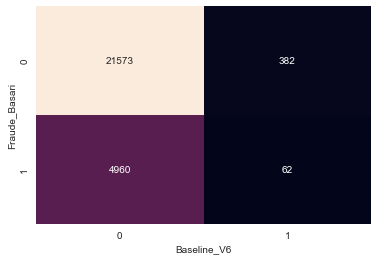

In [50]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V6'] , rownames=['Fraude_Basari'], colnames=['Baseline_V6'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [51]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V6'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 62
False Positives 382
True Negativos 21573
False Negativos 4960
Accuracy 0.8019794639878415
Precision 0.13963963963963963
Recall 0.012345679012345678
F1 0.022685693377241124


### V7: un teléfono con más de un DNI

In [52]:
df['Baseline_V7']=(df['Score_Baseline']+df['V7_Score_Telefono_DNI']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [53]:
df['Baseline_V7'].value_counts()

0    26465
1      512
Name: Baseline_V7, dtype: int64

Confusion Matrix: V7 + Baseline

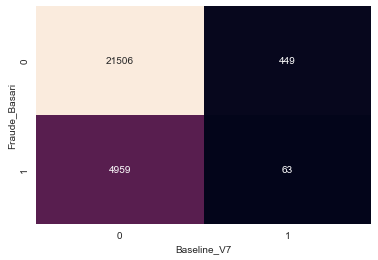

In [54]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V7'] , rownames=['Fraude_Basari'], colnames=['Baseline_V7'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [55]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V7'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 63
False Positives 449
True Negativos 21506
False Negativos 4959
Accuracy 0.799532935463543
Precision 0.123046875
Recall 0.012544802867383513
F1 0.022768341163715216


### V8: un teléfono con más de un email

In [56]:
df['Baseline_V8']=(df['Score_Baseline']+df['V8_Score_Telefono_Email']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [57]:
df['Baseline_V8'].value_counts()

0    26537
1      440
Name: Baseline_V8, dtype: int64

Confusion Matrix: V8 + Baseline

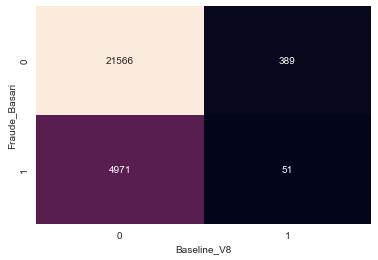

In [58]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V8'] , rownames=['Fraude_Basari'], colnames=['Baseline_V8'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [59]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V8'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 51
False Positives 389
True Negativos 21566
False Negativos 4971
Accuracy 0.80131222893576
Precision 0.1159090909090909
Recall 0.01015531660692951
F1 0.01867447821310875


### V9: un teléfono con más de un dispositivo

In [60]:
df['Baseline_V9']=(df['Score_Baseline']+df['V9_Score_Telefono_Dispositivo']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [61]:
df['Baseline_V9'].value_counts()

0    26524
1      453
Name: Baseline_V9, dtype: int64

Confusion Matrix: V9 + Baseline

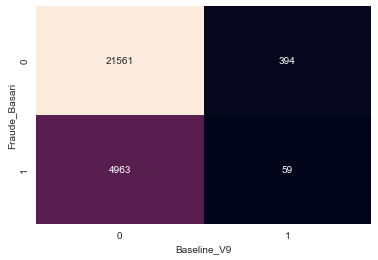

In [62]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V9'] , rownames=['Fraude_Basari'], colnames=['Baseline_V9'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [63]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V9'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 59
False Positives 394
True Negativos 21561
False Negativos 4963
Accuracy 0.8014234347777737
Precision 0.13024282560706402
Recall 0.011748307447232178
F1 0.021552511415525114


### V10: un dispositivo con más de un DNI

In [64]:
df['Baseline_V10']=(df['Score_Baseline']+df['V10_Score_Dispositivo_DNI']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [65]:
df['Baseline_V10'].value_counts()

0    26452
1      525
Name: Baseline_V10, dtype: int64

Confusion Matrix: V10 + Baseline

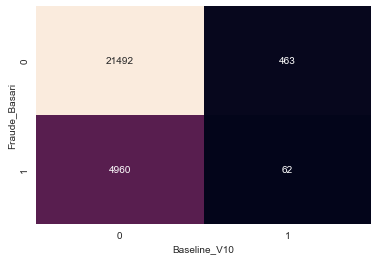

In [66]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V10'] , rownames=['Fraude_Basari'], colnames=['Baseline_V10'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [67]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V10'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 62
False Positives 463
True Negativos 21492
False Negativos 4960
Accuracy 0.7989769062534752
Precision 0.1180952380952381
Recall 0.012345679012345678
F1 0.022354425815756265


### V11: un dispositivo con más de un email

In [68]:
df['Baseline_V11']=(df['Score_Baseline']+df['V11_Score_Dispositivo_DNI']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [69]:
df['Baseline_V11'].value_counts()

0    26526
1      451
Name: Baseline_V11, dtype: int64

Confusion Matrix: V11 + Baseline

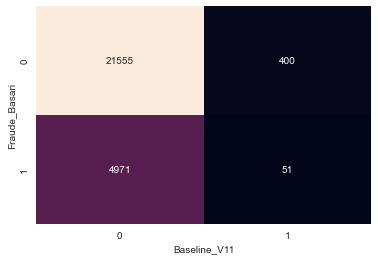

In [70]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V11'] , rownames=['Fraude_Basari'], colnames=['Baseline_V11'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [71]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V11'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 51
False Positives 400
True Negativos 21555
False Negativos 4971
Accuracy 0.8009044741817103
Precision 0.1130820399113082
Recall 0.01015531660692951
F1 0.018636945002740726


### V12: un dispositivo con más de un teléfono

In [72]:
df['Baseline_V12']=(df['Score_Baseline']+df['V12_Score_Dispositivo_DNI']).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [73]:
df['Baseline_V12'].value_counts()

0    26551
1      426
Name: Baseline_V12, dtype: int64

Confusion Matrix: V12 + Baseline

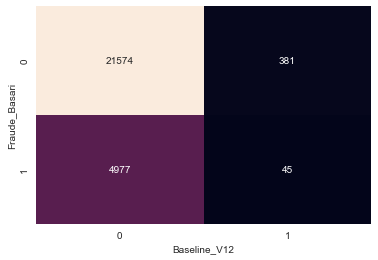

In [74]:
confusion_matrix = pd.crosstab(df['Fraude_Basari'], df['Baseline_V12'] , rownames=['Fraude_Basari'], colnames=['Baseline_V12'])
# normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
sn.set_style("whitegrid")
plt.show()

In [75]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_V12'])
# Aumentamos falsos positivos 
# Recall igual. TP / TP+FN. No es capaz de "apuntar" a los Fraudes Basari, luego se van a Falsos negativos en vez de True Positivos

True Positives 45
False Positives 381
True Negativos 21574
False Negativos 4977
Accuracy 0.8013863661637691
Precision 0.1056338028169014
Recall 0.008960573476702509
F1 0.016519823788546256


### V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12

In [76]:
df['Baseline_V_ALL']=(df['Score_Baseline']+df['V1_Score_DNI_Email']+df['V2_Score_DNI_Telefono']+df['V3_Score_DNI_Dispositivo']+df['V4_Score_Email_DNI']+df['V5_Score_Email_Telefono']+df['V6_Score_Email_Dispositivo']+df['V7_Score_Telefono_DNI']+df['V8_Score_Telefono_Email']+df['V9_Score_Telefono_Dispositivo']+df['V10_Score_Dispositivo_DNI']+df['V11_Score_Dispositivo_DNI']+df['V12_Score_Dispositivo_DNI'])

In [77]:
df['Baseline_V_ALL'].value_counts()

 0      17542
-3       4205
-4       1239
-5        968
-6        684
-7        499
-1        350
-8        319
-2        229
-9        226
-10       183
-11       103
-12        84
-100       75
-50        59
-13        35
-53        26
-103       21
-109       10
-14        10
-101        8
-56         7
-55         6
-104        5
-107        5
-54         4
-51         4
-204        4
-155        4
-60         4
-108        4
-66         4
-102        4
-110        4
-206        3
-117        3
-105        3
-52         3
-57         3
-116        2
-209        2
-127        2
-15         2
-126        1
-160        1
-106        1
-59         1
-150        1
-113        1
-128        1
-156        1
-69         1
-129        1
-114        1
-112        1
-163        1
-200        1
-58         1
-130        1
-76         1
-111        1
-153        1
-62         1
Name: Baseline_V_ALL, dtype: int64

Confusion Matrix: V_X + Baseline

In [78]:
lista_input =['Score_Baseline','V1_Score_DNI_Email','V2_Score_DNI_Telefono','V3_Score_DNI_Dispositivo','V4_Score_Email_DNI','V5_Score_Email_Telefono','V6_Score_Email_Dispositivo','V7_Score_Telefono_DNI','V8_Score_Telefono_Email','V9_Score_Telefono_Dispositivo','V10_Score_Dispositivo_DNI','V11_Score_Dispositivo_DNI','V12_Score_Dispositivo_DNI']

In [79]:
def confusion_matrix_function(lista,A):
    confusion_matrix = pd.crosstab(df['Fraude_Basari'], df[lista].sum(axis=1).apply(lambda x: 1 if x<=A else 0) , rownames=['Fraude_Basari'], colnames=['Baseline_VX'])
    # normalize=True PARA VER MATRIZ EN PORCENTAJE , normalize=True
    sn.heatmap(confusion_matrix,annot=True,cbar=False, fmt='g')
    sn.set_style("whitegrid")
    plt.show()

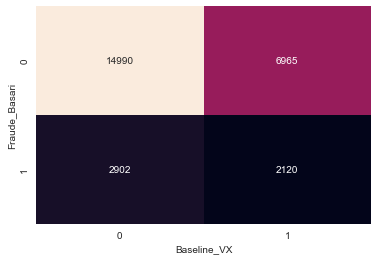

In [80]:
confusion_matrix_function(lista_input,-2)

In [81]:
df['Baseline_VX']=df[lista_input].sum(axis=1).apply(lambda x: 1 if x<=-3 else 0) #Iovation deniega a dia de hoy en -3

In [82]:
calcula_estadisticas_accuracy(df['Fraude_Basari'],df['Baseline_VX'])
# Aumentamos falsos positivos 
# Recall SUBE. TP / TP+FN

True Positives 2070
False Positives 6786
True Negativos 15169
False Negativos 2952
Accuracy 0.6390258368239612
Precision 0.23373983739837398
Recall 0.4121863799283154
F1 0.29831387808041504


# Pendiente

- Cual es la combinacion de variables que aumenta los True Positives y qué variables no aportan nada??